# Aula 2 - Carregando dados e entendendo os dados

Como parte da primeira etapa do nosso processo do CRISP-DM precisamos entender os dados do problema e utilizar dos dados para entender as regras de negócio e o problema que estamos atualmente nos envolvendo.

### Instalando as bibliotecas

Para esse projeto vamos utilizar as bibliotecas do:

- [Pandas](https://pandas.pydata.org/) (Biblioteca para processamento de dados tabulares)
- [Scipy](https://docs.scipy.org/doc/scipy/index.html) (Biblioteca para processamento de sinais e algoritmos científicos)
- [Matplotlib](https://matplotlib.org/) (Biblioteca para gráficos e visualizar resultados)

In [2]:
!pip install pandas
!pip install scipy
!pip install matplotlib

### Carregando os dados

Para carregar os dados precisamos utilizar o `scipy` o que não é usual. Precisamos fazer isso pois os dados compartilhados foram apresentados em um formato `.mat`. Esse é o formato de arquivo gerados pelo MatLab, que é uma ferramenta de soluções de engenharia via software que tem muita força no meio acadêmico. E como os dados são de pesquisas e análises, era esperado que os mesmos fossem compartilhados em formatos relacionados a sistemas de pesquisa.

Dessa forma, podemos abrir e acessar os dados `.mat` da seguinte forma:

In [1]:
import scipy.io

input_data = scipy.io.loadmat('../data/01_raw/Data.mat')
output_data = scipy.io.loadmat('../data/01_raw/Targets.mat')

In [2]:
input_data["Data"].shape

(178, 3571)

In [3]:
output_data["Targets"].shape

(178, 1)

### Visualização dos dados

#### Visualizando o sinal

Sabemos que o dado que temos dentro dos arquivos é um dado de um sinal de vibração pelo que coletamos do Kaggle. Sendo assim podemos visualizar esse dado ao longo do tempo da seguinte forma:

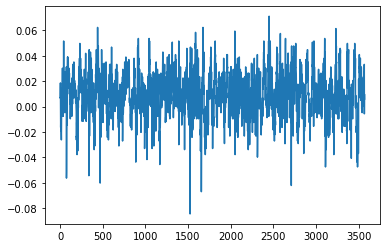

In [4]:
import matplotlib.pyplot as plt

plt.plot(input_data["Data"][0,:])
plt.show()

#### Visualizando o periodograma

Podemos também criar o periodograma, que é a assinatura desse sinal em frequência. É a representação do sinal no espaço de frequência, isso significa que o sinal foi quebrado em todas as suas componentes em diferentes frequências para serem representados no gráfico. Neste gráfico nós vemos a intensidade que o sinal apresenta em cada frequência diferente.

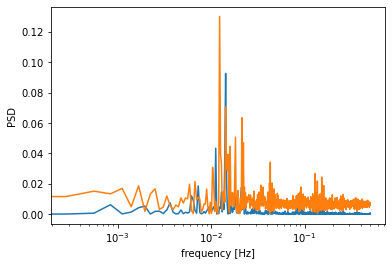

In [5]:
from scipy import signal

x = input_data["Data"][0,:]
f, Pxx_den = signal.periodogram(x, 1)

x2 = input_data["Data"][1,:]
f2, Pxx_den2 = signal.periodogram(x2, 1)

plt.plot(f, Pxx_den)
plt.plot(f2, Pxx_den2)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.xscale('log')
plt.show()

#### Visualizando padrões comuns aos sinais

Sistemas mecânicos que apresentam as mesmas formas e materiais, normalmente apresentam as mesmas frequências, e ressoam da mesma forma. Desta forma, se você tem alguns rolamentos mesmo que minimamente diferentes, em frequência eles se compartam da mesma forma.

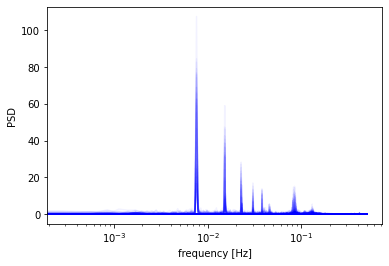

In [6]:
for i in range(0, input_data["Data"].shape[0]):
    f, Pxx_den = signal.periodogram(input_data["Data"][i,:], 1)
    plt.plot(f, Pxx_den, color='blue', alpha=0.05)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.xscale('log')
plt.show()

#### Visualização das falhas
 
Em um mundo ideal, em que não existe desgaste, o comportamento seria sempre o mesmo. Porém cada falha e problema, deveria resultar em um comportamento em frequência específico daquele problema. Uma vez que cada falha significa uma particular fição mecânica, é esperado que cada falha resulte em um comportamento em frequência específico.

In [14]:
output_list = output_data["Targets"].T.tolist()[0]
output_types = list(set(output_list))
print(output_types)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


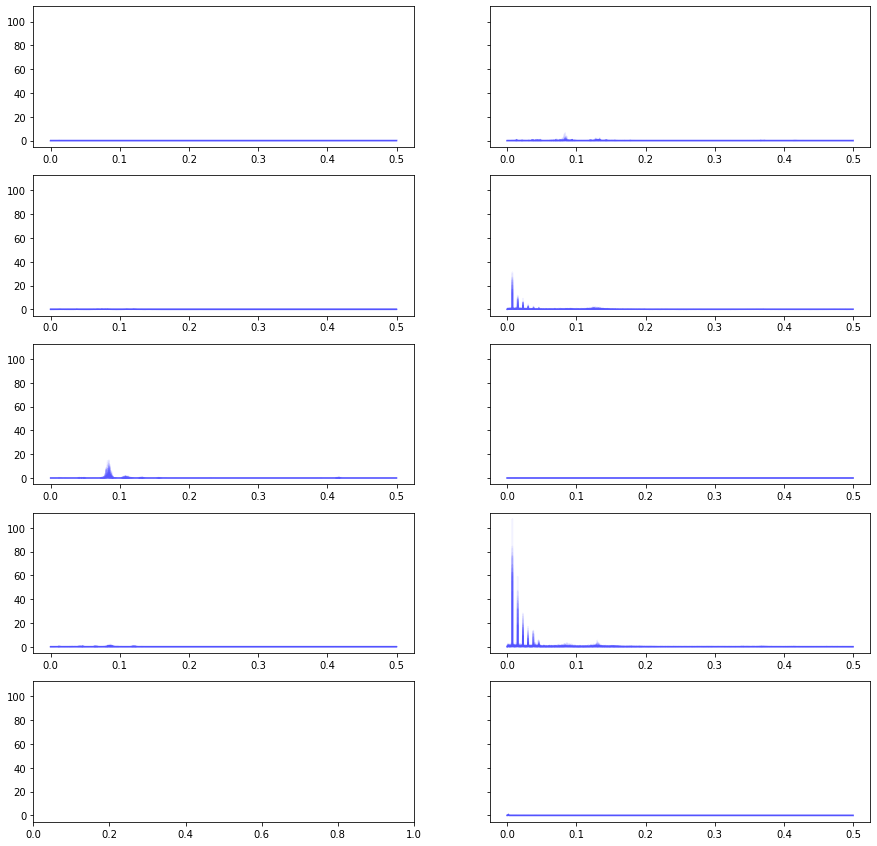

In [17]:
f, axes = plt.subplots(5, 2, sharey=True)
f.set_figheight(15)
f.set_figwidth(15)

output_map = {
    1: [0, 0],
    2: [1, 0],
    3: [2, 0],
    4: [3, 0],
    5: [0, 1],
    6: [1, 1],
    7: [2, 1],
    8: [3, 1],
    9: [4, 1]
}

for out_type in output_types:
    ax_index = output_map[out_type]
    indexes = [i for i, x in enumerate(output_list) if x == out_type]
    for i in indexes:
        f, Pxx_den = signal.periodogram(input_data["Data"][i,:], 1)
        axes[ax_index[0], ax_index[1]].plot(f, Pxx_den, color='blue', alpha=0.05)
plt.show()

In [ ]:
f, axes = plt.subplots(5, 2, sharey=True)
f.set_figheight(15)
f.set_figwidth(15)

out_type = 1

indexes = [i for i, x in enumerate(output_list) if x == out_type]
for i in indexes:
    f, Pxx_den = signal.periodogram(input_data["Data"][i,:], 1)
    axes[ax_index[0], ax_index[1]].plot(f, Pxx_den, color='blue', alpha=0.05)
plt.show()